In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.pipeline import Pipeline, FeatureUnion
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
# from xgboost import plot_importance
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
import statsmodels.api as sm

import pandas as pd
import numpy as np
import time

import pickle
import joblib

import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.io as pio
pd.options.plotting.backend = 'plotly'
init_notebook_mode(connected=True)
pio.renderers.default = "notebook_connected"

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

## Í∏∞ÎåÄ ÏàòÎ™ÖÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏù∏Ïóê ÎåÄÌïú ÌöåÍ∑Ä Î∂ÑÏÑù
---
6Ï°∞ Í≥†ÏÑ∏ÏòÅ & ÍπÄÌòÑÏßÑ
<div>
    <div style="text-align:center";>
    <img src="../imgs/youngandjin_new.gif", style='width=150px; height:530px;'>
    </div>

## 1. Í∞úÏöî
---
- ÌîÑÎ°úÏ†ùÌä∏ Ï£ºÏ†ú ÏÑ†Ï†ï ÎèôÍ∏∞
- ÌîÑÎ°úÏ†ùÌä∏ Î™©Ï†Å

### ÌîÑÎ°úÏ†ùÌä∏ Ï£ºÏ†ú ÏÑ†Ï†ï ÎèôÍ∏∞
- Covid 19Î°ú Í±¥Í∞ïÏóê ÎåÄÌïú Í¥ÄÏã¨ ‚Üë
- 100ÏÑ∏ ÏãúÎåÄÎ•º ÏΩî ÏïûÏóê ÎëêÍ≥† ÏûàÎäî ÏöîÏ¶ò <br>
  Í∑∏ÎÉ• Ïò§Îûò ÏÇ¨Îäî Í≤ÉÎ≥¥Îã§ <strong>Í±¥Í∞ï ÌïòÍ≤å Ïò§Îûò ÏÇ¨Îäî Í≤É</strong>Ïù¥ Ï§ëÏöî
- Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ÎûÄ? 
    - ÌäπÏ†ï ÏãúÍ∏∞Ïóê ÌÉúÏñ¥ÎÇú Ïù∏Íµ¨Ïùò ÏòàÏÉÅÎêòÎäî ÏàòÎ™Ö <br>
      (ÌèâÍ∑† ÏàòÎ™Ö: ÌäπÏ†ï ÏãúÍ∏∞Ïóê ÏÇ¨ÎßùÌïú Ïù∏Íµ¨Ïùò ÏàòÎ™Ö)
    - ÏÑ∏Í≥Ñ ÌèâÍ∑†: 2000ÎÖÑ 67ÏÑ∏ ‚ñ∑ 2018ÎÖÑ 73ÏÑ∏
    - ÌïúÍµ≠ ÌèâÍ∑†: 2000ÎÖÑ 76ÏÑ∏ ‚ñ∑ 2018ÎÖÑ 83ÏÑ∏
- Í∏∞ÎåÄ ÏàòÎ™ÖÏùÑ ÎäòÎ¶¨Îäî ÏöîÏù∏Ïù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏïåÏïÑÎ≥¥Ïûê

### ÌîÑÎ°úÏ†ùÌä∏ Î™©Ï†Å
- Í∏∞ÎåÄ ÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÎêú ÏöîÏù∏ Î∂ÑÏÑù <br>
- Îã§ÏñëÌïú Î™®Îç∏ÏùÑ ÌôúÏö©Ìïú Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÎßÅ 
- Í∞úÎ∞úÎèÑÏÉÅÍµ≠ Îì± Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ ÎÇÆÏùÄ Íµ≠Í∞Ä ÎåÄÏÉÅ, Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ ÎÇÆÏùÄ Ïù¥Ïú† Î∞è ÏàòÎ™Ö Ï†úÍ≥† Î∞©Ïïà Î∂ÑÏÑù
<br>

### Dataset
- Ï∂úÏ≤ò: [Kaggle "Life-Expectancy(WHO)"](https://www.kaggle.com/kumarajarshi/life-expectancy-who)
- Í∞úÏöî: 2000~2015ÎÖÑ 193Í∞úÍµ≠Ïùò Í∏∞ÎåÄÏàòÎ™Ö Î∞è Í¥ÄÎ†® ÏöîÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖã
- Ï¢ÖÏÜç Î≥ÄÏàò(Target): Í∏∞ÎåÄ ÏàòÎ™Ö
- ÎèÖÎ¶Ω Î≥ÄÏàò(Features): Ï¥ù 19Í∞ú / 5Í∞ú ÎåÄÎ∂ÑÎ•òÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑù
<div>
    <img src='../imgs/col_def.png', width = '550'>
</div>

### Í≤∞Ï∏°Ïπò Ï∞æÍ∏∞
Ïõê Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò ÌôïÏù∏
- missingno
- bar chart ÏãúÍ∞ÅÌôî
<br>
<div>
<img src="../imgs/data_missingno.png", width='900'/></div>
<br>
<div>
<img src="../imgs/data_missing.png", width='900'/></div>

### Feature ÎåÄÎ∂ÑÎ•òÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï∂îÏù¥
- Í≤ΩÏ†ú
<div>
<img src='../imgs/yearly_economy.png'/, width='1200'></div>

- Ïú†Î≥ëÎ•†
<div>
<img src='../imgs/yearly_illness.png'/, width='1300'></div>

- ÏòàÎ∞©Ï†ëÏ¢Ö
<div>
<img src='../imgs/yearly_vaccine.png'/, width='1300'></div>

- Í∏∞ÌÉÄ
<div>
<img src='../imgs/yearly_others.png'/, width='1300'></div>

### RegionÎ≥Ñ ÎåÄÎ∂ÑÎ•òÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï∂îÏù¥
- World bank Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•ò Í∏∞Ï§Ä (Ï¥ù 7Í∞ú)
<div>
<img src='../imgs/world-regions.png'/, width='1000'></div>

- Í≤ΩÏ†ú
<div>
<img src='../imgs/region_economy.png','style=width:2000px;'/></div>

- ÏÇ¨ÎßùÎ•†
<div>
<img src='../imgs/region_death.png'/, width='2000'></div>

- Ïú†Î≥ëÎ•†
<div>
<img src='../imgs/region_illness.png'/, width='2000'></div>

- ÏòàÎ∞© Ï†ëÏ¢Ö
<div>
<img src='../imgs/region_vaccine.png'/, width='2000'></div>

- Í∏∞ÌÉÄ
<div>
<img src='../imgs/region_others.png'/, width='2200'></div>

### Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Î≤ï
1. Íµ≠Í∞Ä ÏûêÏ≤¥ ÏÇ≠Ï†ú (Ï¥ù 10Í∞ú ÏÇ≠Ï†ú -> 183Í∞úÍµ≠)
    - ÌñâÏù¥ 1Í∞úÏù∏ Íµ≠Í∞Ä
        - Monaco, Nauru, Dominica, Palau, Tuvalu, San Marino, Marshall Islands, St.Kitts and Nevis
    - Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Îã§Ïàò Ï°¥Ïû¨ÌïòÎäî Íµ≠Í∞Ä
        - Somalia, North Korea
2. Ïã†Í∑ú Îç∞Ïù¥ÌÑ∞Î°ú Ïª¨Îüº Ï†ÑÏ≤¥ ÍµêÏ≤¥
    - World BankÏùò Íµ≠Í∞ÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥†
        - Percentage Expenditure, Infant death, GDP, Population
    - ÏùºÎ∂Ä ÎàÑÎùΩÎêú Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥† (http://hdr.undp.org/en/content/download-data)
        - Income Composition of Resources

3. Í≤∞Ï∏°ÏπòÎ•º Ï†úÏô∏Ìïú MeanÍ∞íÏúºÎ°ú ÎåÄÏ≤¥<br>
    - Íµ≠Í∞ÄÎ≥Ñ MeanÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
        - Íµ≠Í∞Ä ÎÇ¥ ÌäπÏ†ï Ïó∞ÎèÑÎßå Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞
            - Total expenditure : 2015ÎÖÑ Í≤∞Ï∏°Ïπò - ÏµúÍ∑º 2Í∞úÎÖÑ(2013~2014 ÌèâÍ∑†)
            - Schooling, HepatitisB, Diphtheria : Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïó∞ÎèÑÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ ÌèâÍ∑†<br><br>
    - RegionÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ MeanÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
        - Íµ≠Í∞Ä Ï†ÑÏ≤¥ ÌñâÏù¥ Î™®Îëê Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞
            - Schooling : RegionÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
<br><br>
4. ÎÇòÎùºÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞êÎ•† Ï∂îÏù¥Ïóê Îî∞Îùº Ï≤òÎ¶¨
    - Îã§ÏàòÏùò 1Í∞ú Ïó∞ÎèÑÎßå ÎπÑÏñ¥ÏûàÎäî Íµ≠Í∞ÄÎäî ÎÇòÎùºÎ≥Ñ Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞êÎ•† Ï∂îÏù¥Ïóê ÎßûÏ∂∞ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
        - Alcohol<br>
- ‚Äª GDP per capita Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä

### Í≤∞Ï∏°Ïπò ZERO!
<div>
<img src='../imgs/notnull_missingno.png'/ width='1200'></div>

## 2. EDA
---

### Î≥ÄÏàò Heatmap
- TargetÏù∏ Í∏∞ÎåÄ ÏàòÎ™Ö(Life expectancy)Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ Features ÌôïÏù∏
- ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:  ÍµêÏú° Ï†ïÎèÑ(Schooling) 0.8, ÏûêÏõêÏùò ÏÜåÎìù Íµ¨ÏÑ±(Income composition of resources) 0.8
- ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: ÏòÅÏïÑ ÏÇ¨ÎßùÎ•†(Infant deaths) -0.9, ÏÑ±Ïù∏ ÏÇ¨ÎßùÎ•†(Adult mortality) -0.7

<div>
<img src="../imgs/heatmap_new.png", width='800'/></div>

#### ÏûêÏõêÏùò ÏÜåÎìù Íµ¨ÏÑ±(Income composition of resources) Ïù¥ÎûÄ?
- ÏÜåÎìùÍ≥º ÏûêÏõêÏùò Í∞ÄÏö©ÏÑ±Ïóê Í¥ÄÌïú Ïù∏Ï†Å ÏûêÏõê Í∞úÎ∞ú ÏßÄÏàòÎ•º 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú ÎÇòÌÉÄÎÇ∏ Í≤É

    - <U>Ïù∏Ï†Å ÏûêÏõê Í∞úÎ∞ú ÏßÄÏàò (HDI) = (1/3) x (ÏÜåÎìùÏßÄÏàò) + (1/3) x (Í∏∞ÎåÄÏàòÎ™ÖÏßÄÏàò) + (1/3) √ó (ÍµêÏú°ÏßÄÏàò)</U>
<div><br>
<img src="../imgs/human_development_index_HDI.png", width='900'/></div>

### ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Features ÎÇòÎùºÎ≥Ñ Ï∂îÏù¥
- Schooling
- Income composition of resources
<img src='../imgs/schooling.png' style='height:370px; width:1000px;'/>
<img src='../imgs/hdi.png' style='height:370px; width:1000px;'/>

- Infant deaths
- Adult mortality
<img src='../imgs/infant_deaths.png' style='height:380px; width:1000px;'/>
<img src='../imgs/adult_mortality.png' style='height:380px; width:1000px;'/>

In [2]:
life_df = pd.read_csv("../datas/life_expectancy_data_fillna.csv")
life_df.columns = [cols.upper() for cols in life_df.columns.tolist()]

# Developing: 0, developed: 1
life_df["STATUS"] = [row.replace("Developing","0") for row in life_df["STATUS"].tolist()]
life_df["STATUS"] = [row.replace("Developed","1") for row in life_df["STATUS"].tolist()]
life_df["STATUS"] = [int(row) for row in life_df["STATUS"].tolist()]

life_df.reset_index(drop=True, inplace=True)
# GDP per capita Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
GDP_PERCAP = pd.read_csv("../datas/worldbank_gdppercap.csv")
GDP_PERCAP = GDP_PERCAP.groupby('Country Code').mean()
GDP_PERCAP.drop(columns= ['2016', '2017','2018','2019','2020'],axis=1,inplace=True)

# life_dfÏóê GDP per capita Ïª¨Îüº Ï∂îÍ∞Ä
life_df["GDP_PERCAP"] = [GDP_PERCAP.loc[life_df['COUNTRYCODE'][i]][str(life_df['YEAR'][i])] for i in range(len(life_df))]
life_df["GDP_PERCAP"].fillna(life_df["GDP"]/life_df["POPULATION"], inplace=True)

#### Life expactancy & GDP per capita
---

In [3]:
fig = px.scatter(life_df, x="GDP_PERCAP", y="LIFE_EXPECTANCY", size="POPULATION", color="REGION", animation_frame="YEAR",
           hover_name="COUNTRY", log_x=True, size_max=60, range_y=[40,90])
fig.show()

In [4]:
fig = px.scatter(life_df, x="GDP_PERCAP", y="LIFE_EXPECTANCY", animation_frame="YEAR", animation_group="COUNTRY",
           size="POPULATION", color="REGION", hover_name="COUNTRY", facet_col="REGION",
           log_x=True, size_max=60,range_y=[40,100])
fig.show()

#### LIFE_EXPECTANCYÏôÄ INCOME_COMPOSITION_OF_RESOURCES

In [5]:
fig = px.scatter(life_df, x="INCOME_COMPOSITION_OF_RESOURCES", y="LIFE_EXPECTANCY", animation_frame="YEAR", animation_group="COUNTRY",
           size="POPULATION", color="REGION", hover_name="COUNTRY", facet_col="REGION",  
           size_max=50, range_x=[life_df["INCOME_COMPOSITION_OF_RESOURCES"].min(),life_df["INCOME_COMPOSITION_OF_RESOURCES"].max()], range_y=[50,90])
fig.show()

## 3. Data Preprocessing
---
- Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    - status: Developed, Developing
- GDP per capita Ï∂îÍ∞Ä
- ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ 4Í∞úÏùò ÌîºÏ≤òÏóê ÎåÄÌïú ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞

#### Í∏∞ÎåÄ ÏàòÎ™Ö(Life expectancy)Í≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Features
- ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:  ÍµêÏú° Ï†ïÎèÑ(Schooling) 0.8, ÏûêÏõêÏùò ÏÜåÎìù Íµ¨ÏÑ±(Income composition of resources) 0.8
- ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: ÏòÅÏïÑ ÏÇ¨ÎßùÎ•†(Infant deaths) -0.9, ÏÑ±Ïù∏ ÏÇ¨ÎßùÎ•†(Adult mortality) -0.7

#### Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÏùòÏã¨ÎêòÎäî Ïª¨Îüº
- Income composition of resources - Schooling 0.9 

### Ïù¥ÏÉÅÏπò Ï†úÍ±∞
- ÏÉÅÏúÑ 5Í∞ú featureÏóê ÎåÄÌïú regionÎ≥Ñ boxplot
<img src='../imgs/boxplot_top.png'/>

### Boxplot
- Schooling, Income composition of resources
<img src='../imgs/boxplot_schooling.png' style='height:400px; width:1000px;'/>
<img src='../imgs/boxplot_hdi.png' style='height:400px; width:1000px;'/>

- Infant deaths, Adult Mortality
<img src='../imgs/boxplot_adult.png' style='height:400px; width:1000px;'/>
<img src='../imgs/boxplot_infant.png' style='height:400px; width:1000px;'/>

### PCA Ï∞®Ïõê Ï∂ïÏÜå
<p>Ï†ÅÏ†àÌïú n_components Í∞úÏàò Í≥†ÎØº</p><br>
<img align='left' src='../imgs/elbow.png' style='height:450px; width:600px;'/>
<img align='left' src='../imgs/pca_df.png' style='height:270px; width:700px;'/>


<p>ÎëêÍ∞úÏùò Ï£ºÏÑ±Î∂ÑÏùÑ Ïûò Íµ¨Î∂ÑÌïòÎäî feature</p><br>
<img align='left' src='../imgs/pca_2.png' style='height:450px; width:600px;'/>
<img align='left' src='../imgs/pca_country.png' style='height:450px; width:600px;'/>

## 4. Modeling
---
1. Dataset preprocessing
2. Model Pipeline & params
3. Í≤∞Í≥º ÌôïÏù∏
4. Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞ predict

### Data preprocessing
---
- Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    - status: Developed, Developing
- GDP per capita Ï∂îÍ∞Ä
- ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ 4Í∞úÏùò ÌîºÏ≤òÏóê ÎåÄÌïú ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞

In [8]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ 4Í∞úÏùò ÌîºÏ≤òÏóê ÎåÄÌïú ÏïÑÏõÉÎùºÏù¥Ïñ¥ Ï†úÍ±∞ÍπåÏßÄ Ï†ÑÏ≤òÎ¶¨
original = pd.read_csv("../datas/life_expectancy_data_fillna.csv")

def add_feature(original, filename=None):
    path = "../datas/worldbank_"
    original.columns = [cols.upper() for cols in original.columns.tolist()]
    
    if not filename == None:
        df = pd.read_csv(f"{path}{filename}.csv").groupby('Country Code').mean()
        df.drop(columns=['2016', '2017','2018','2019','2020'], axis=1, inplace=True)
        col_name = filename.upper()
        original[col_name] = [df.loc[original['COUNTRYCODE'][i]][str(original['YEAR'][i])] 
                              for i in range(len(original))]
    return original

# GDP per capita Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
original = add_feature(original, "gdppercap")

# NanÍ∞í GDP/POPÏúºÎ°ú ÎåÄÏ≤¥
original["GDPPERCAP"].fillna(original["GDP"] / original["POPULATION"], inplace=True)
original.columns = [cols.upper() for cols in original.columns.tolist()]

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ - status: Developed, Developing
original = pd.get_dummies(original, columns=['STATUS'], drop_first=True)

# Í∏∞ÎåÄÏàòÎ™ÖÏóê ÎåÄÌïú ÎÇòÎ®∏ÏßÄ featureÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
corr_matrix = original.drop(['COUNTRYCODE','ISO3166','COUNTRY','YEAR', 'REGION','INCOMEGROUP'], axis=1).corr()
corr_matrix['LIFE_EXPECTANCY'].sort_values(ascending=False)

# LIFE_EXPECTANCYÏôÄ ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî ÌîºÏ≤ò Ïàú Ï†ïÎ†¨
top_corr = abs(corr_matrix['LIFE_EXPECTANCY']).sort_values(ascending=False)[1:5]
top_features = top_corr.index.tolist()

# lower fence, upper fence
region = original['REGION'].unique().tolist()
fence = {}

for r in region:
    fence[r] = {}
    
    for i, f in enumerate(top_features):
        q1 = np.percentile(original[original['REGION'] == r][top_features[i]].values, 25)
        q3 = np.percentile(original[original['REGION'] == r][top_features[i]].values, 75)
        iqr = q3 - q1

        upper_fence = ((iqr * 1.5) + q3).round(3)
        lower_fence = (q1 - (iqr * 1.5)).round(3)
                
        fence[r][f] = [lower_fence, upper_fence]
   
    
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
region = original['REGION'].unique().tolist()
drop_list, target_idx = [], []

for r in region:
    target_df = original[original['REGION'] == r]
    
    for f in top_features:
        drop_idx = target_df[(target_df[f] < fence[r][f][0]) | 
                  (target_df[f] > fence[r][f][1])].index.tolist()
        
        drop_list.append(drop_idx)

# Ï†úÍ±∞ ÎåÄÏÉÅ Ïù∏Îç±Ïä§
target_idx = set([idx for lst in drop_list for idx in lst])
original = original.drop(target_idx, axis=0)

print('top features:', top_features)

top features: ['INFANT_DEATHS', 'SCHOOLING', 'INCOME_COMPOSITION_OF_RESOURCES', 'ADULT_MORTALITY']


### Pipeline & Params
---
- Linear Regression
- Decison Tree Regressor
- PCA + Linear Regression
- PLS Regression
- Gradient Boosting Regressor
- XGBoost Regressor
- Random Forest Regressor
- Support Vector Regressor
- Lasso
- Ridge
- Kernel Ridge Regression

In [9]:
pipe_linear = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_tree = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', DTR())])
pipe_lasso = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state=13))])
pipe_ridge = Pipeline([
                ('scl', StandardScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state=13))])
pipe_pca = Pipeline([
                ('scl', StandardScaler()),
                ('pca', PCA()), 
                 ('fit',LinearRegression())])
pipe_pls = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', GBR())])
pipe_xgbr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', XGBR(random_state=13))])
pipe_rfr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', RFR(random_state=13))])
pipe_svr = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', StandardScaler()),
                 ('fit', KernelRidge())])

In [10]:
grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_tree = [{
  }]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : np.logspace(-5,1,10) ,     
                     }]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,0,10) ,
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]

min_samples_split_range = [0.5, 0.7, 0.9]
max_depth = [2, 4, 6, 8]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : max_depth,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_xgbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : max_depth,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]

In [11]:
pipe = [
    pipe_linear, pipe_tree, pipe_lasso, pipe_ridge, pipe_pca ,
    pipe_pls, pipe_gbr, pipe_xgbr, pipe_rfr, pipe_svr, pipe_KR 
]

params = [
    grid_params_linear, grid_params_tree, grid_params_lasso, grid_params_ridge, grid_params_pca,
    grid_params_pls, grid_params_gbr, grid_params_xgbr, grid_params_rfr, grid_params_svr, grid_params_KR
]
jobs = -1
cv = KFold(n_splits=5 , shuffle=True, random_state=13)
# cv = ShuffleSplit(n_splits=5 , test_size=0.2, random_state=13)

grid_dict = {
    0: 'Linear Regression', 
    1: 'Decison Tree Regressor',
    2: 'Lasso',
    3: 'Ridge',
    4: 'PCA Regression', 
    5: 'PLS Regression',
    6: "Gradient Boosting Regressor",
    7: "XGBoost Regressor",
    8: "Random Forest Regressor",
    9: "Support Vector Regressor",
    10: "Kernel Ridge Regression"
            }

### Model Fit
---
- GridSearchCV
- Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [12]:
X = original.drop(['COUNTRYCODE','ISO3166','COUNTRY','YEAR','LIFE_EXPECTANCY','REGION','INCOMEGROUP'], axis=1)
y = original['LIFE_EXPECTANCY']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=13)

#### GridSerachCVÎ°ú modeling Î∞è model save

In [19]:
model_rmse = {}
model_r2 = {}
model_best_params = {}
model_fit_times = {}

for idx , (param , model) in enumerate(zip(params , pipe)):
    start_time = time.time()
    search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error", 
                          cv=cv, n_jobs=jobs, verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    model_rmse[grid_dict.get(idx)] = np.sqrt(mse(y_test, y_pred))  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_
    model_fit_times[grid_dict.get(idx)] = time.time() - start_time
    joblib.dump(search, f'../../models/{grid_dict.get(idx)}1.pkl') 
print("finish")

[22:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { loss, max_features, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


finish


#### Modeling results

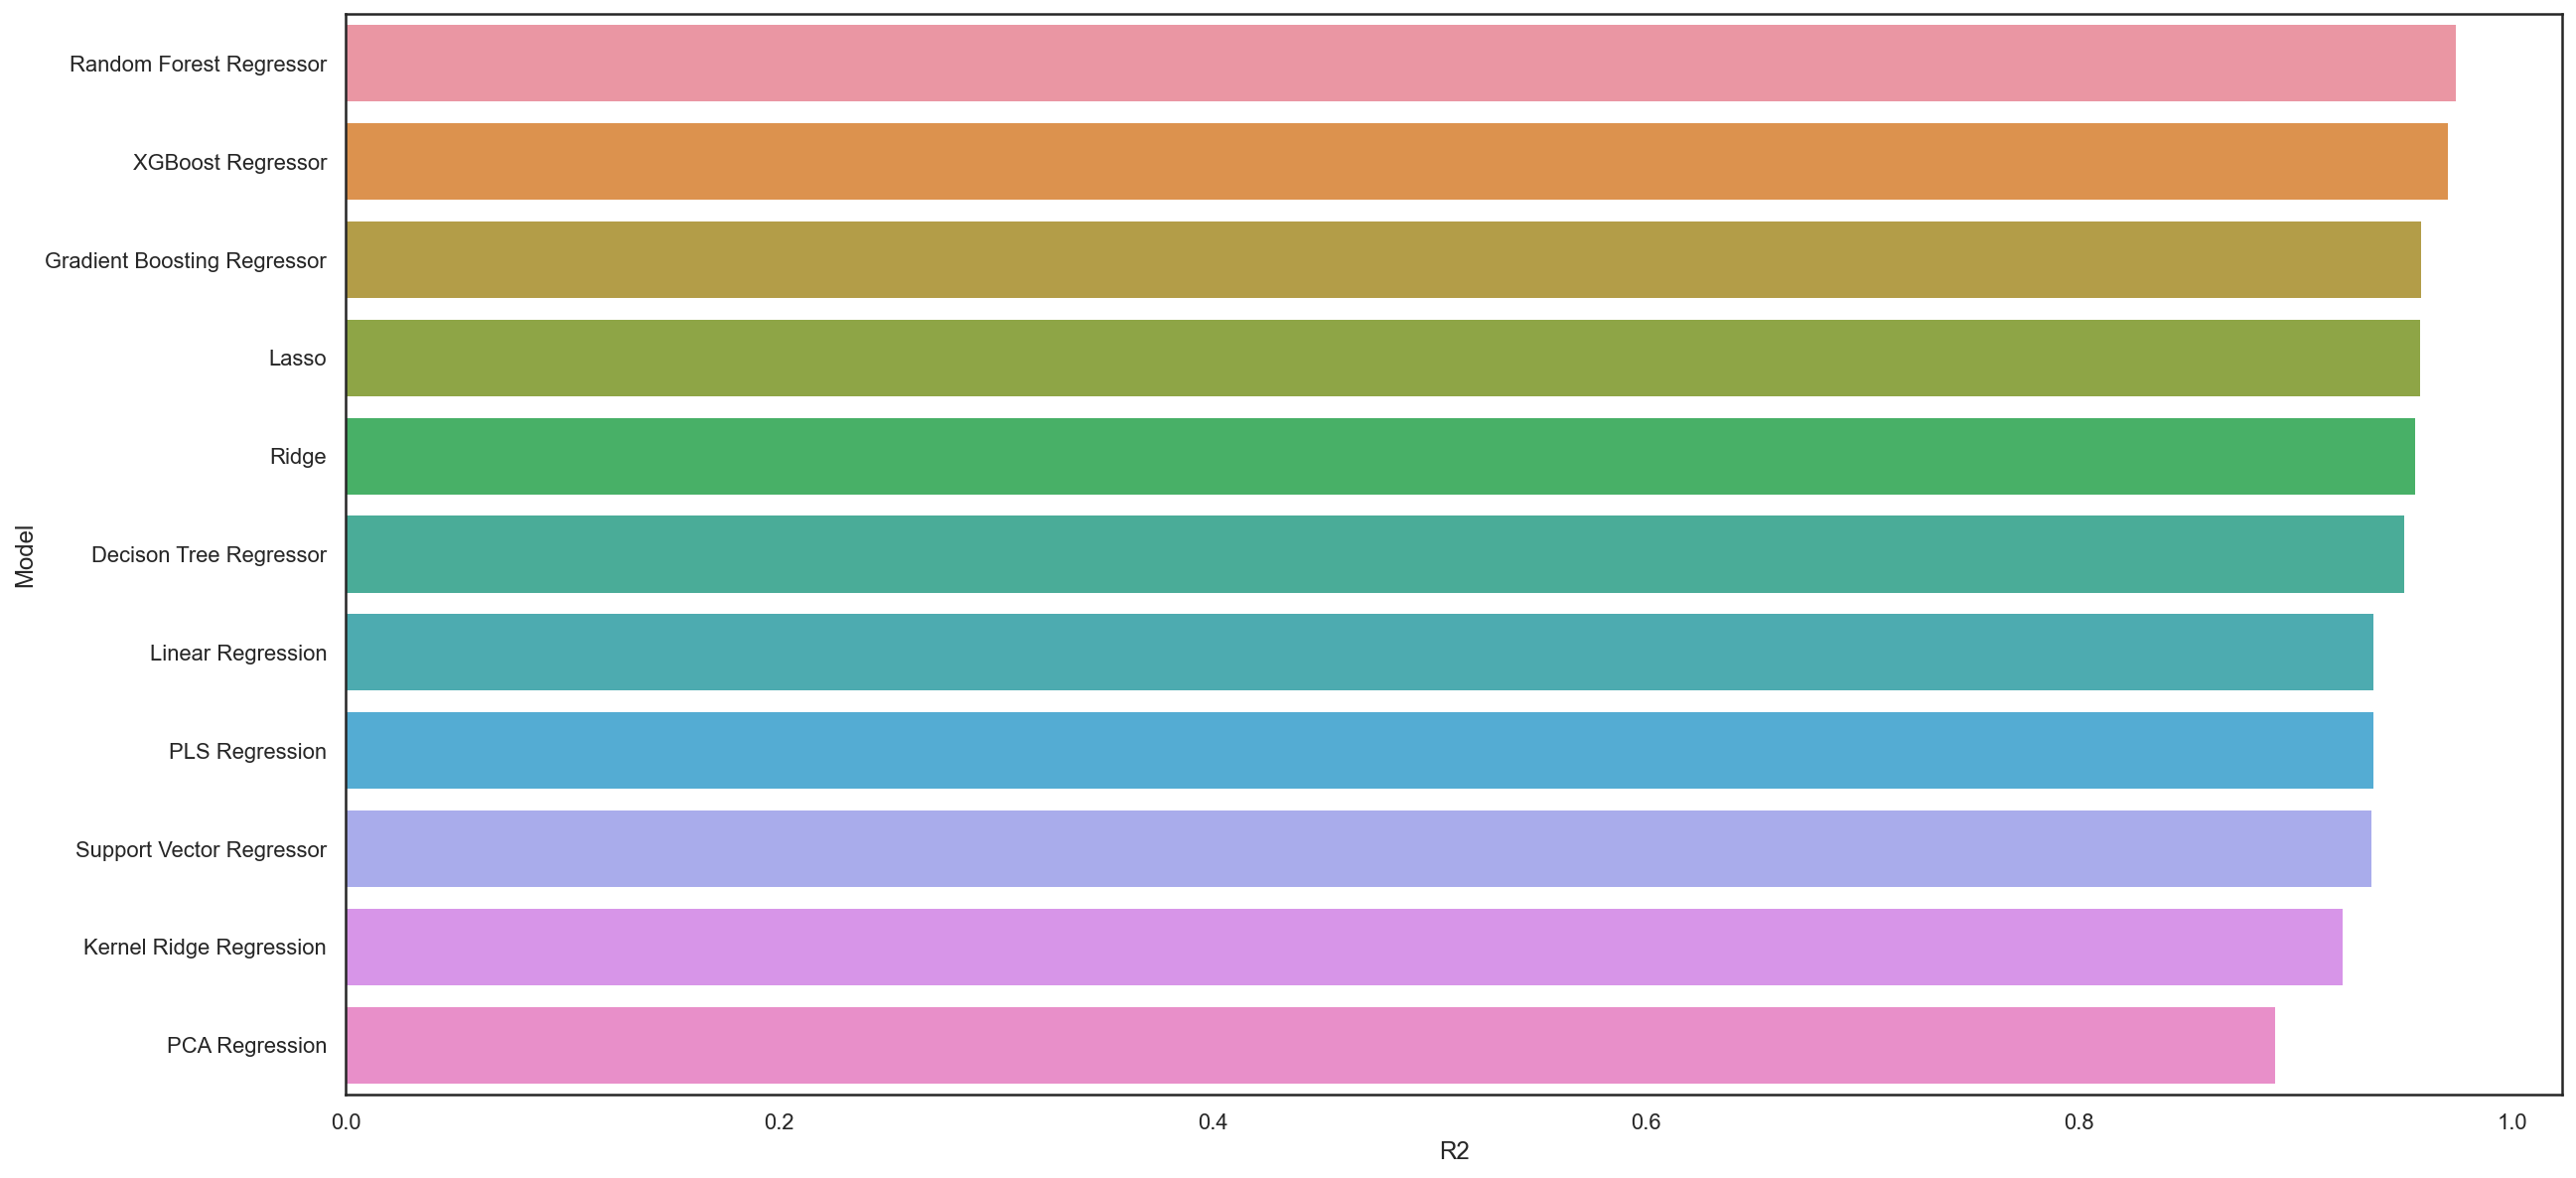

In [20]:
# Modeling Í≤∞Í≥º
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values(), model_rmse.values(), model_fit_times.values()], index = ["Model","R2", "RMSE", "Fit_times"]).T
output.sort_values(["R2"], ascending= False ,inplace=True)
output["Fit_times"] = [abs(_) for _ in output["Fit_times"]]
ax = sns.barplot(y="Model", x="R2", data=output)
plt.show()

In [21]:
output['R2'] = [float(_) for _ in output['R2']]
output['RMSE'] = [float(_) for _ in output['RMSE']]
output

Model        R2      RMSE  Fit_times
8       Random Forest Regressor  0.974162  1.548812   3.470998
7             XGBoost Regressor  0.970760  1.647630  56.767075
6   Gradient Boosting Regressor  0.958086  1.972662  20.694993
2                         Lasso  0.957876  1.977602  21.131880
3                         Ridge  0.955366  2.035664  23.002916
1        Decison Tree Regressor  0.950426  2.145357   0.125665
0             Linear Regression  0.936309  2.431698   0.156581
5                PLS Regression  0.936057  2.436519   0.181515
9      Support Vector Regressor  0.935315  2.450599  20.873154
10      Kernel Ridge Regression  0.922043  2.690293   4.235447
4                PCA Regression  0.890904  3.182559   0.160561

In [22]:
px.scatter(output,x='RMSE', y='R2', color='Model', labels='Model')

In [23]:
# Model().get_params().keys()Î°ú Í∞ÄÎä•Ìïú params Ï°∞Ìöå Í∞ÄÎä•
model_best_params

{'Linear Regression': {'fit__fit_intercept': True, 'poly__degree': 1},
 'Decison Tree Regressor': {},
 'Lasso': {'fit__alpha': 0.021544346900318822,
  'fit__tol': 0.0016681005372000592,
  'poly__degree': 2},
 'Ridge': {'fit__alpha': 5.0,
  'fit__solver': 'lsqr',
  'fit__tol': 0.005994842503189409,
  'poly__degree': 2},
 'PCA Regression': {'pca__n_components': 7},
 'PLS Regression': {'fit__n_components': 7},
 'Gradient Boosting Regressor': {'fit__loss': 'ls',
  'fit__max_depth': 6,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'XGBoost Regressor': {'fit__loss': 'ls',
  'fit__max_depth': 8,
  'fit__max_features': 'sqrt',
  'fit__min_samples_split': 0.5},
 'Random Forest Regressor': {},
 'Support Vector Regressor': {'fit__degree': 2,
  'fit__gamma': 0.021544346900318822,
  'fit__kernel': 'rbf'},
 'Kernel Ridge Regression': {'fit__gamma': 0.004641588833612777,
  'fit__kernel': 'rbf'}}

### Ï∂îÍ∞Ä Predict
--- 

In [24]:
grid_dict = {
0: 'Linear Regression', 
1: 'Decison Tree Regressor',
2: 'Lasso',
3: 'Ridge',
4: 'PCA Regression', 
5: 'PLS Regression',
6: "Gradient Boosting Regressor",
7: "XGBoost Regressor",
8: "Random Forest Regressor",
9: "Support Vector Regressor",
10: "Kernel Ridge Regression"
        }

#### 2019ÎÖÑ ÌïúÍµ≠ Îç∞Ïù¥ÌÑ∞

In [25]:
testset = pd.DataFrame(columns = original.columns)
new_dict = {'COUNTRYCODE': 'KOR',
            'YEAR':2019, 'STATUS_Developing': 0,
            'LIFE_EXPECTANCY':83,
            'GDP': 1646739.22, 
            'GDPPERCAP':31846.2, 
            'SCHOOLING':14, 
            'INFANT_DEATHS':3,
            'ADULT_MORTALITY':110,
            'INCOME_COMPOSITION_OF_RESOURCES':0.916,
            'POPULATION': 51709000,
           }
testset = testset.append(new_dict, ignore_index=True)
testset.fillna(original.mean(), inplace=True)
testset

COUNTRYCODE    ISO3166  COUNTRY  YEAR  LIFE_EXPECTANCY  ADULT_MORTALITY  \
0         KOR  431.09992      NaN  2019               83              110   

   INFANT_DEATHS   ALCOHOL  PERCENTAGE_EXPENDITURE  HEPATITIS_B      MEASLES  \
0              3  4.953657                5.970516     74.39988  2484.270584   

         BMI  UNDER_FIVE_DEATHS      POLIO  TOTAL_EXPENDITURE  DIPHTHERIA  \
0  38.186211          44.645084  82.776579           5.940164   82.573541   

   HIV/AIDS         GDP  POPULATION  THINNESS_1_19_YEARS  THINNESS_5_9_YEARS  \
0  1.746603  1646739.22    51709000             7.745723            4.972702   

   INCOME_COMPOSITION_OF_RESOURCES  SCHOOLING  REGION  INCOMEGROUP  GDPPERCAP  \
0                            0.916         14     NaN          NaN    31846.2   

   STATUS_Developing  
0                  0

In [28]:
# Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ predictÌïòÎäî Ìï®Ïàò
def model_predict(model_idx, test_df):
    saved_model = joblib.load(f"../../models/{grid_dict.get(model_idx)}1.pkl")
    X_pr = test_df[X.columns]
    y_pr = test_df['LIFE_EXPECTANCY']

    y_pred = saved_model.predict(X_pr)
    print(f"{grid_dict.get(model_idx)} | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:{y_pred.mean().round(2)} / RMSE:, {np.sqrt(mse(y_pr, y_pred)).round(2)}")
    r2_score = r2(y_pr, y_pred)
    if r2_score is True:
        print("R2:", r2_score)

In [29]:
for idx, model_idx in enumerate(range(len(grid_dict))):
    model_predict(model_idx,testset)

Linear Regression | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:81.35 / RMSE:, 1.65
Decison Tree Regressor | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:76.9 / RMSE:, 6.1
Lasso | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:79.98 / RMSE:, 3.02
Ridge | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:78.78 / RMSE:, 4.22
PCA Regression | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:77.01 / RMSE:, 5.99
PLS Regression | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:80.9 / RMSE:, 2.1
Gradient Boosting Regressor | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:72.87 / RMSE:, 10.13
XGBoost Regressor | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:80.44999694824219 / RMSE:, 2.55
Random Forest Regressor | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:78.47 / RMSE:, 4.53
Support Vector Regressor | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:80.62 / RMSE:, 2.38
Kernel Ridge Regression | ÏòàÏ∏° Í∏∞ÎåÄ ÏàòÎ™Ö:83.41 / RMSE:, 0.41


### 5. Model results visualization
----

In [30]:
data_df = pd.concat([original[X.columns], original['LIFE_EXPECTANCY']], axis=1)

X = data_df[X.columns]
y = data_df['LIFE_EXPECTANCY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

data_df['split'] = 'train'
data_df.loc[X_test.index, 'split'] = 'test'

In [31]:
# reg plot Ìï®Ïàò
def reg_plotly(model_idx):
    model = joblib.load(f"../../models/{grid_dict.get(model_idx)}1.pkl")
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    data_df['prediction'], data_df['y_test'], data_df['y_train']= y_pred, y_test, y_pred

    fig = px.scatter(
            data_df, x=data_df['LIFE_EXPECTANCY'], y=data_df['prediction'],
            marginal_y='histogram', color='split', title=f"{grid_dict.get(model_idx)} Model", 
            color_discrete_sequence=['red', 'cornflowerblue']) #mediumaquamarine

    fig.update_traces(histnorm='probability', selector={'type':'histogram'})

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=y.min(), y0=y.min(),
        x1=y.max(), y1=y.max()
    )
    fig.update_layout(font_size=14, width=1000, height=600, template='plotly_white')
    fig.show()

In [32]:
reg_plotly(0)

In [33]:
reg_plotly(8)

## 5. Í≤∞Î°†
---
- ÌäπÏù¥Ìïú ÏÇ¨Î°ÄÎì§Ïóê ÎåÄÌïú EDA

### Í∏∞ÎåÄÏàòÎ™Ö Í¥ÄÎ†® EDA
- Í∏∞ÎåÄÏàòÎ™Ö ÏÉÅÏúÑ / ÌïòÏúÑ 10% Íµ≠Í∞ÄÍ∞Ñ ÎπÑÍµê
    - Í∏∞ÎåÄÏàòÎ™ÖÍ≥º ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî ÏÉÅÏúÑ 4Í∞ú ÌîºÏ≤òÎì§Ïùò ÏàòÏπò ÎπÑÍµê
- Í∏∞ÎåÄÏàòÎ™Ö ÏÉÅÏúÑ 10% Ï§ë Í∞úÎ∞úÎèÑÏÉÅÍµ≠
    - Í∞úÎ∞úÎèÑÏÉÅÍµ≠ ÌèâÍ∑†ÎåÄÎπÑ Ïñ¥Îñ§ ÌîºÏ≤òÍ∞Ä ÎÜíÏùÄ ÏàòÏπòÎ•º Î≥¥Ïù¥ÎäîÏßÄ
- Í∏∞ÎåÄÏàòÎ™ÖÏù¥ ÏùºÏ†ï ÏàòÏπòÎ•º Ïú†ÏßÄÌïòÍ±∞ÎÇò ÌïòÎùΩÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù¥Îäî ÎÇòÎùº
    - Ï¶ùÍ∞êÎ•† ÎπÑÍµê

#### Í∏∞ÎåÄÏàòÎ™Ö ÏÉÅÏúÑ / ÌïòÏúÑ 10% Íµ≠Í∞ÄÍ∞Ñ ÎπÑÍµê
- Life Expectancy
<img src='../imgs/lifex_status.png' style='height:450px; width:1000px;'/>

- Schooling
- Income composition of resources
<img src='../imgs/schooling_status.png' style='height:400px; width:1000px;'/>
<img src='../imgs/hdi_status.png' style='height:400px; width:1000px;'/>

#### Í∏∞ÎåÄÏàòÎ™Ö ÏÉÅÏúÑ 10% Ï§ë Í∞úÎ∞úÎèÑÏÉÅÍµ≠
- 60Í∞úÏùò row Ï§ë France, Finland, Greece, Canada, Korea, Rep., Chile, Israel
<img src='../imgs/developing_vs.png' style='height:500px; width:1000px;'/>

#### Í∏∞ÎåÄÏàòÎ™ÖÏù¥ Ï†ÑÎÖÑÎåÄÎπÑ 7ÏÑ∏ Ïù¥ÏÉÅ ÌïòÎùΩÏùÑ Î≥¥Ïù¥Îäî ÎÇòÎùº
<p>- Ï¥ù 23Í∞úÍµ≠</p><br>
<img align='left' src='../imgs/fluct_plot.png' style='height:600px; width:850px;'/>
<img align='left' src='../imgs/fluct_five.png' style='height:600px; width:800px;'/>

#### Í∏∞ÎåÄÏàòÎ™ÖÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏?
<img align='left' src='../imgs/haiti_bar.png' style='height:550px; width:830px;'/>
<img align='left' src='../imgs/nigeria_bar.png' style='height:550px; width:830px;'/>

## 6. ÌöåÍ∑Ä ÌîÑÎ°úÏ†ùÌä∏Î•º ÎßàÏπòÎ©∞...
---

#### Ïù¥Îü∞ Îúª ÍπäÏùÄ Í≤ΩÌóòÏù¥ÏóàÏäµÎãàÎã§
- Îã§ÏñëÌïú ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ïç®Î≥¥Î©∞ ÌïôÎ¨∏ÏúºÎ°úÎßå Î∞∞Ïö∞Îçò Í≤ÉÏùÑ ÏßÅÏ†ë Í≥†ÎØºÌï¥Î≥º Ïàò ÏûàÎäî Í≤ΩÌóò
    - Feature selection, paramater ÏÑ§Ï†ï, PCA Îì±..
- World bank, WHO Îì± Íµ≠Ï†ú Í∏∞Íµ¨ ÏÇ¨Ïù¥Ìä∏ Î∞è ÎÖºÎ¨∏ Îì±ÏùÑ ÌÜµÌï¥ Í¥ÄÎ†® Ïô∏Î∂Ä ÏßÄÏãù ÏäµÎìù
- ÌöåÍ∑Ä Î™®Îç∏ÎßÅ Îøê ÏïÑÎãàÎùº Ìö®Í≥ºÏ†ÅÏù∏ Í≤∞Í≥º ÌëúÌòÑÏùÑ ÏúÑÌïú ÏãúÍ∞ÅÌôî ÏãúÎèÑ
- Î∞∞ÏõÄÏóêÎäî ÎÅùÏù¥ ÏóÜÍµ¨ÎÇò..üë©‚Äçüéì

#### Í∑∏ÎüºÏóêÎèÑ Ïù¥Îü∞ Ï†êÏù¥ ÏïÑÏâΩÏäµÎãàÎã§
- Model R2Í∞Ä ÎÜíÎã§Í≥† Ìï¥ÎèÑ Î¨¥Ï°∞Í±¥ predict Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏùÄ Í≤ÉÏù¥ ÏïÑÎãàÎùºÎãà?
    - ÏµúÏ†ÅÏùò ModelÏùÑ ÏÑ†ÌÉùÌïòÎäî Î∞©Î≤ïÏùÑ ÎçîÏö± Ïó∞Íµ¨ÌïòÍ≥† Ïã∂ÏäµÎãàÎã§
- Î∞±Ïã† Í¥ÄÎ†® FeatureÎì§Ïù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏòÅÌñ•Î†•Ïù¥ ÎÜíÏßÄ ÏïäÏïòÏßÄÎßå
<br> ÏΩîÎ°úÎÇò Î∞±Ïã† ÎèÑÏûÖÏãúÏ†ê, Î∞±Ïã† Ï†ëÏ¢ÖÎ•†Ïóê Îî∞Î•∏ Í∏∞ÎåÄÏàòÎ™ÖÎèÑ Í∂ÅÍ∏àÌï¥Ï°åÏäµÎãàÎã§

## üìàTHANK YOU!üìâ
---
<div>
    <div style="text-align:center";>
    <img src="../imgs/youngandjin2.gif", style='width=50px; height:180px;'>
    </div>